# Forecasts

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from pyFTS.common.Util import load_obj
import os

In [5]:
models = os.listdir('../data/fts_models')

In [10]:
models = [model for model in models if "75_percent_50_partitions" in model and "model" == model[:5]]

In [11]:
models

['model_100_train_with_75_percent_50_partitions.model',
 'model_25_train_with_75_percent_50_partitions.model',
 'model_35_train_with_75_percent_50_partitions.model',
 'model_50_train_with_75_percent_50_partitions.model']

In [12]:
sufix = "_train_with_75_percent_50_partitions.model"
prefix = "model_"

In [18]:
fts_models = {}
for model in models:
    grid = model[len(prefix):-len(sufix)]
    file = f'../data/fts_models/{model}' 
    fts_models[grid] = load_obj(file)

In [20]:
fts_models['25']

In [31]:
reductions = [rd for rd in os.listdir('../data/som_reductions') if '10000_epochs.csv' in rd]
prefix = len('reduction_')
sufix = len('_10000_epochs.csv')

som_reductions = {}
for rd in reductions:
    grid = rd[prefix:-sufix]
    print(grid)
    file = f'../data/som_reductions/{rd}' 
    som_reductions[grid] = pd.read_csv(file, index_col=0)

50
25
100
35


In [33]:
test = round(len(som_reductions['50'])*0.25)
test

4934

In [38]:
forecasts = {}
for grid in fts_models:
    forecasts[grid] = fts_models[grid].predict(som_reductions[grid][-test:])

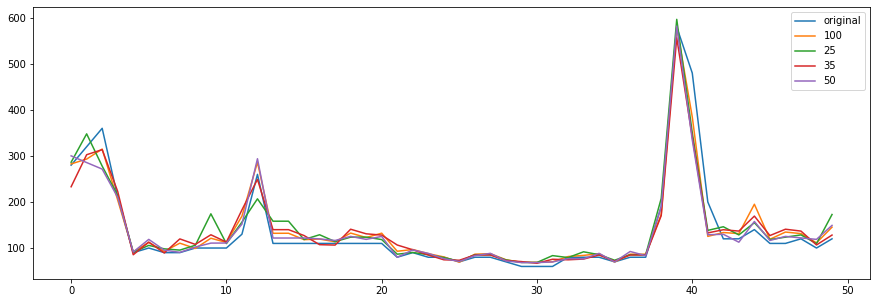

In [50]:
plt.figure(figsize=(15,5))

original = som_reductions['100']['Appliances'][-test:].values
plt.plot(original[:50], label='original')

for grid in forecasts:
    plt.plot(forecasts[grid][:50], label=grid)
plt.legend();

In [41]:
plt.figure(figsize=(15,5))

original = som_reductions['100']['Appliances'][-test:].values
plt.plot(original[:50], label='original')

for grid in forecasts:
    plt.plot(forecasts[grid][:50], label=grid)
plt.legend();

,x,y,Appliances
0,46.0,41.569219,60
1,44.0,0.000000,60
2,42.5,2.598076,50
3,39.5,7.794229,50
4,3.5,40.703194,60
...,...,...,...
19730,24.5,25.114737,100
19731,25.0,24.248711,90
19732,23.5,26.846788,270
19733,19.5,30.310889,420
